# [Epi/Biostats 101] HW 4: Pandas

In [23]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In this homework, you will be analyzing the Hot Flashes dataset using your knowledge of Pandas and basic statistics

# About: Hot Flashes Dataset 

### Background
Menopause heralds a complex array of hormonal and physiologic changes, the most common of which is the
feverish discomfort of hot flashes and often accompanied by sweating, chills and anxiety. The Mayo Clinic defines a 
hot flash as the “sudden feeling of warmth in the upper body which is usually most intense over the face, neck and 
chest”. Among women in the menopausal transition, hot flashes typically occur daily, are between 2-5 minutes 
duration, and can be expected to persist for more than 7 years. Variations in hot flash experiences during the menopausal transition among different populations have been 
observed but are incompletely understood. Freeman et al (2001) explored race differences in self-reported hot 
flashes in a multivariable analysis that also considered other hypothesized correlates: prior symptoms of menopause, 
current reproductive hormone levels, obesity, sedentary lifestyle and smoking

### Purpose 
The purpose of this study was to investigate race differences in the odds (OR) of self-reported hot flashes (African 
American versus Caucasian), both unadjusted and after adjustment for pre-menopausal symptoms, current 
reproductive hormone levels, obesity, sedentary lifestyle, smoking, age, and education.

### Study Design
The original study of Freeman et al (2001) was a 14-year prospective cohort study of ovarian aging. Participants 
were generally healthy and regularly menstruating women aged 35-47 at the time of enrollment and were recruited 
through random digit dialing in Philadelphia County, PA. Recruitment was stratified by race to ensure equal 
numbers of African American and Caucasian women.
This dataset is cross-sectional, as it only contains baseline data.

### Resources

- Pandas API Reference: https://pandas.pydata.org/docs/reference/index.html
- Seaborn API reference: https://seaborn.pydata.org/api.html
- Hot Flashes Data Dictionary
- ChatGPT/StackOverflow

---

### Question 1

Use a Pandas function to assign `hot_flashes_df` to a dataframe (table) containing the hot flashes data. Then, assign `num_rows`, `num_columns` and `column_names` to the number of rows, columns and a list of the column names in the dataset, respectively.

In [24]:
hot_flashes_df = pd.read_csv('hot_flashes.csv')

num_rows = hot_flashes_df.shape[0]
num_columns = hot_flashes_df.shape[1]
column_names = hot_flashes_df.columns.to_list()

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')
print(f'Column Names: {column_names}')

Number of rows: 375
Number of columns: 15
Column Names: ['Unnamed: 0', 'pt', 'ageg', 'aagrp', 'edu', 'd1', 'f1a', 'pcs12', 'hotflash', 'bmi30', 'estra', 'fsh', 'lh', 'testo', 'dheas']


In [25]:
hot_flashes_df.head(5)

,Unnamed: 0,pt,ageg,aagrp,edu,d1,f1a,pcs12,hotflash,bmi30,estra,fsh,lh,testo,dheas
0,0,3,2,0,1,0,0,56.80537,0,0,106.71,3.005,2.980,7.680,61.225
1,1,6,3,0,1,0,0,59.18338,0,0,31.25,11.195,5.760,11.930,104.920
2,2,7,1,0,1,0,1,57.73952,0,0,13.41,14.545,5.595,24.375,117.450
3,3,8,1,0,1,1,0,55.83575,1,0,10.64,5.530,2.260,8.280,36.850
4,4,9,2,0,1,0,1,55.89324,0,0,24.06,9.780,2.600,4.050,11.165


### Question 2
In our dataframe, we have an extra column that was added by mistake called `Unnamed: 0`. Reassign `hot_flashes_df` to a dataframe that does not have this column.

In [26]:
hot_flashes_df = hot_flashes_df.drop('Unnamed: 0', axis=1)

hot_flashes_df.head(5)

,pt,ageg,aagrp,edu,d1,f1a,pcs12,hotflash,bmi30,estra,fsh,lh,testo,dheas
0,3,2,0,1,0,0,56.80537,0,0,106.71,3.005,2.980,7.680,61.225
1,6,3,0,1,0,0,59.18338,0,0,31.25,11.195,5.760,11.930,104.920
2,7,1,0,1,0,1,57.73952,0,0,13.41,14.545,5.595,24.375,117.450
3,8,1,0,1,1,0,55.83575,1,0,10.64,5.530,2.260,8.280,36.850
4,9,2,0,1,0,1,55.89324,0,0,24.06,9.780,2.600,4.050,11.165


### Question 3
Suppose we want to use the `aagrp` variable later on. What does it represent according to the data dictionary? Rename this column with a more descriptive name.

In [27]:
hot_flashes_df = hot_flashes_df.rename(columns={'aagrp':'race'})
hot_flashes_df.head(5)

,pt,ageg,race,edu,d1,f1a,pcs12,hotflash,bmi30,estra,fsh,lh,testo,dheas
0,3,2,0,1,0,0,56.80537,0,0,106.71,3.005,2.980,7.680,61.225
1,6,3,0,1,0,0,59.18338,0,0,31.25,11.195,5.760,11.930,104.920
2,7,1,0,1,0,1,57.73952,0,0,13.41,14.545,5.595,24.375,117.450
3,8,1,0,1,1,0,55.83575,1,0,10.64,5.530,2.260,8.280,36.850
4,9,2,0,1,0,1,55.89324,0,0,24.06,9.780,2.600,4.050,11.165


### Question 4

Assign the variables `num_smokers` and `num_nonsmokers` to the number of smokers and non smokers in the dataset.  

Then, assign `smokers_df` and `nonsmokersdf` to a dataframe with the rows of smokers and non-smoker, respectively. You may need to refer to the data dictionary to understand what the column names mean.

In [28]:
num_smokers = sum(hot_flashes_df['f1a'])
smokers_df = hot_flashes_df[hot_flashes_df['f1a'] == 1]

num_nonsmokers = hot_flashes_df.shape[0] - sum(hot_flashes_df['f1a'])
nonsmokers_df = hot_flashes_df[hot_flashes_df['f1a'] == 0]

print(f'Number of smokers: {num_smokers}')
print(f'Number of nonsmokers: {num_nonsmokers}')

# This value should be the same as the number of rows
print(f'Total number of people: {num_smokers + num_nonsmokers}')

Number of smokers: 138
Number of nonsmokers: 237
Total number of people: 375


### Question 5

Compare the rate of hot flashes symptoms experienced among smokers and the rate of hot flashes symptoms experienced  among nonsmokers. What do you notice?

In [29]:
num_smokers_with_hf = smokers_df[smokers_df['d1'] == 1]
num_nonsmokers_with_hf = smokers_df[smokers_df['d1'] == 1]

rate_smokers = num_smokers_with_hf.shape[0] / num_smokers
rate_nonsmokers = num_nonsmokers_with_hf.shape[0] / num_nonsmokers

print(f'Rate of hot flashes symptoms among smokers: {rate_smokers}')
print(f'Rate of hot flashes symptoms among nonsmokers: {rate_nonsmokers}')

Rate of hot flashes symptoms among smokers: 0.4855072463768116
Rate of hot flashes symptoms among nonsmokers: 0.28270042194092826


**Rate of hot flashes symptoms seems to be higher among smokers than nonsmokers. Not sure if we can infer association or causation based on rate alone.**

### Question 6

Create a new column in `hot_flashes_df` that is the logarithm of the Baseline Testosterone Hormone. Name this new column `log_testo`

In [30]:
hot_flashes_df['log_testo'] = np.log(hot_flashes_df['testo'])

hot_flashes_df.head(5)

,pt,ageg,race,edu,d1,f1a,pcs12,hotflash,bmi30,estra,fsh,lh,testo,dheas,log_testo
0,3,2,0,1,0,0,56.80537,0,0,106.71,3.005,2.980,7.680,61.225,2.038620
1,6,3,0,1,0,0,59.18338,0,0,31.25,11.195,5.760,11.930,104.920,2.479056
2,7,1,0,1,0,1,57.73952,0,0,13.41,14.545,5.595,24.375,117.450,3.193558
3,8,1,0,1,1,0,55.83575,1,0,10.64,5.530,2.260,8.280,36.850,2.113843
4,9,2,0,1,0,1,55.89324,0,0,24.06,9.780,2.600,4.050,11.165,1.398717


### Question 7

Use the Seaborn library to create a histogram of the Baseline Estradiol (pg/ml), segmented by whether or not the patient has ever had menopause symptoms. Without regards to the interpretation of this distribution, how would you describe the spread and center of this distribution?  
(Hint: use the parameter 'hue', refer to the concept of skew)

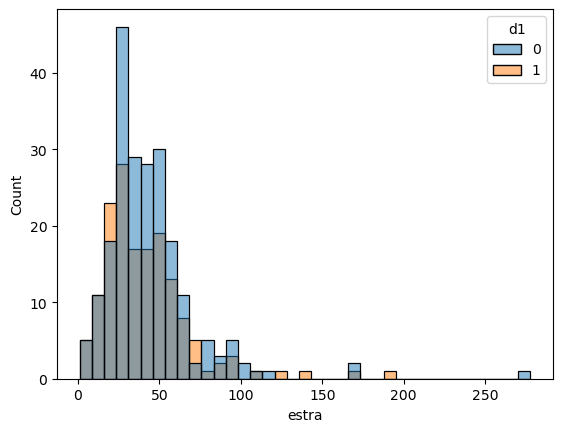

In [31]:
sns.histplot(data=hot_flashes_df, x='estra', hue='d1');

**The distributions of Baseline Estradiol seem to be unimodal. They have a tail towards larger values and both seem to be right skewed.**

### Question 8

Use the Seaborn library like you did in question 4 to create a scatterplot of the Baseline Estradiol (pg/ml) and Baseline Testosterone Hormone segmented by race.  
(Hint: use the parameter 'hue')

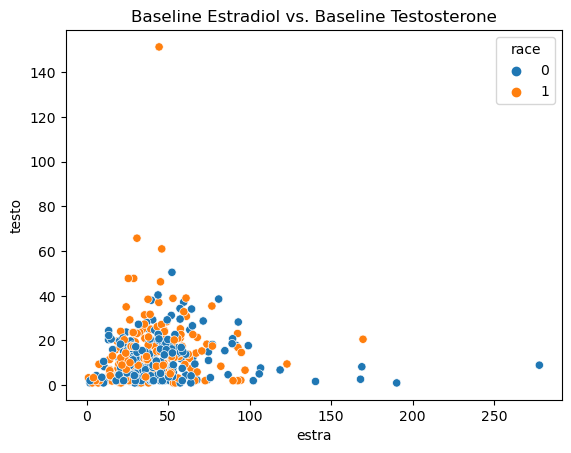

In [32]:
sns.scatterplot(data=hot_flashes_df, x='estra', y='testo', hue='race');
plt.title('Baseline Estradiol vs. Baseline Testosterone');

---

### Submission
Congratulations! You have finished homework 4 You should now have a better grasp of the following concepts:
- Utilize pandas to subset dataframes
- Use the shape function to determine the number of columns or rows in a dataset
- Create or modify columns in a dataframe
- Use seaborn to make data visualizations

Please submit this assignment to bCourses.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### Sources  
1. https://www.causeweb.org/tshs/hot-flashes/